In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_data(X, y, feature_names, resolution=0.02):
    axis_max = abs(x).max().round() + 1
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Data')

def plot_decision_boundaries(X, y, clf, feature_names, resolution=0.02):
    # Plot the decision surface
    axis_max = abs(x).max().round() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(-axis_max, axis_max, resolution),
                           np.arange(-axis_max, axis_max, resolution))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    
    plt.figure(figsize=(10, 10))
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    
    # Plot class sample
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    
    plt.xlim(-axis_max, axis_max)
    plt.ylim(-axis_max, axis_max)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Nearest Neighbor')

# 1D

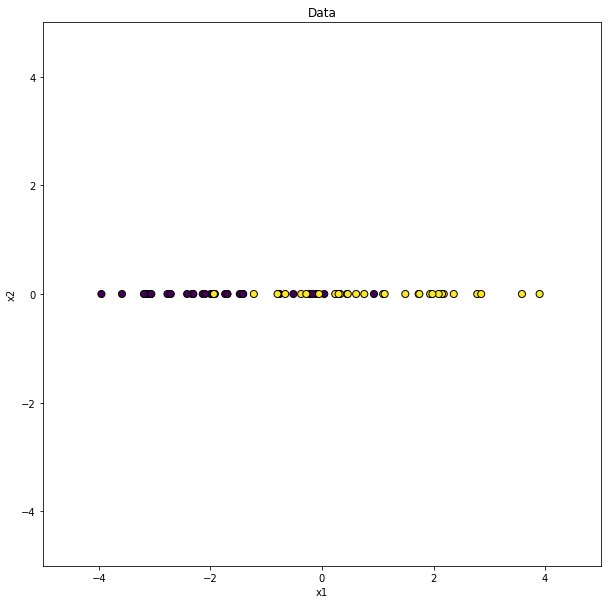

In [3]:
def get_1d(n_samples, mean, variance):
    """
    Returns 1-dimensional n_samples of each class (0 and 1) 
    coming from normal distribution of (mean, variance) and (-mean, variance) for classes 0 and 1 respectively
    """
    k1 = np.random.multivariate_normal([-mean,0],[[variance,0],[0,0]], size=n_samples)
    k2 = np.random.multivariate_normal([mean,0],[[variance,0],[0,0]], size=n_samples)
    x = np.concatenate([k1,k2])
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return x, y

n_samples = 30
mean = 1.5
variance = 2
x, y = get_1d(n_samples, mean, variance)
plot_data(x, y, ['x1','x2'])

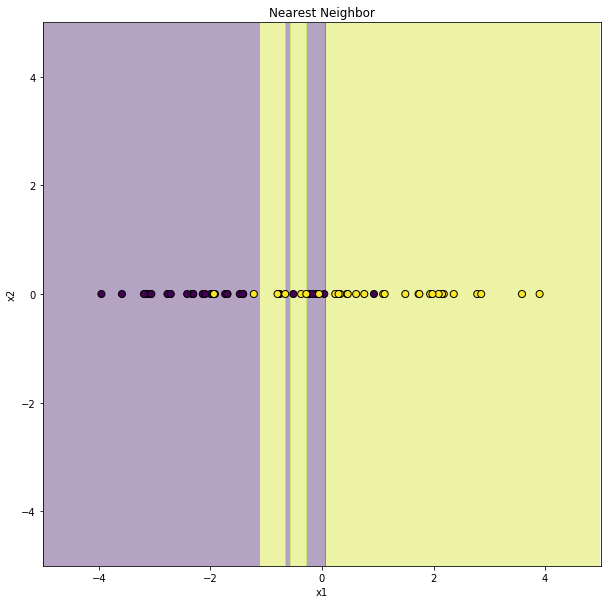

In [4]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)
plot_decision_boundaries(x, y, knn, ['x1','x2'])

# 2D

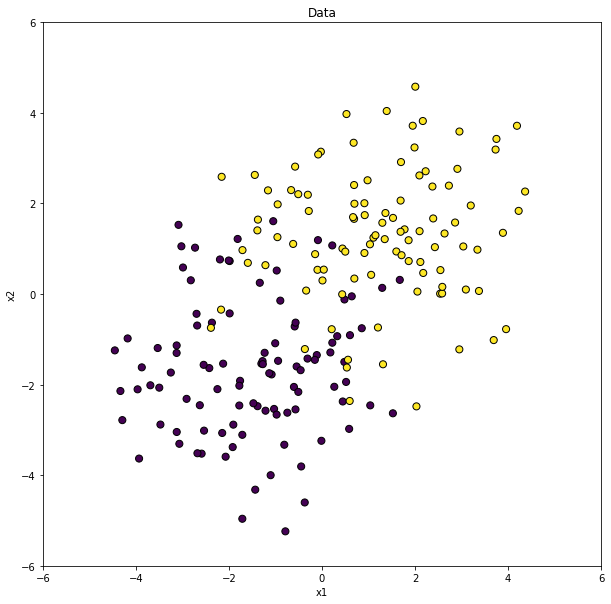

In [5]:
def get_2d(n_samples, mean, variance):
    """
    Returns 2-dimensional n_samples of each class (0 and 1) 
    coming from normal distribution of ((mean, mean), variance) and ((-mean, -mean), variance) 
    for classes 0 and 1 respectively
    """
    k1 = np.random.multivariate_normal([-mean, -mean],[[variance,0],[0,variance]], size=n_samples)
    k2 = np.random.multivariate_normal([mean, mean],[[variance,0],[0,variance]], size=n_samples)
    x = np.concatenate([k1,k2])
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return x, y
    
n_samples = 100
mean = 1.5
variance = 2
x, y = get_2d(n_samples, mean, variance)
plot_data(x, y, ['x1','x2'])

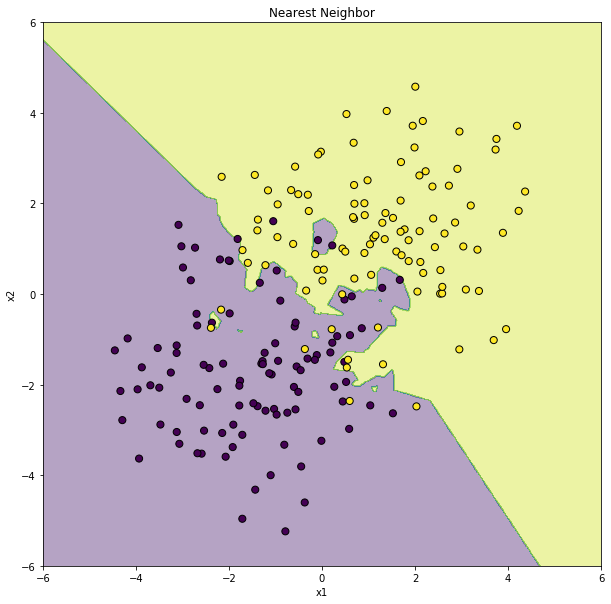

In [6]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k, p=2)
knn.fit(x, y)
plot_decision_boundaries(x, y, knn, ['x1','x2'])

# 2D with Noise

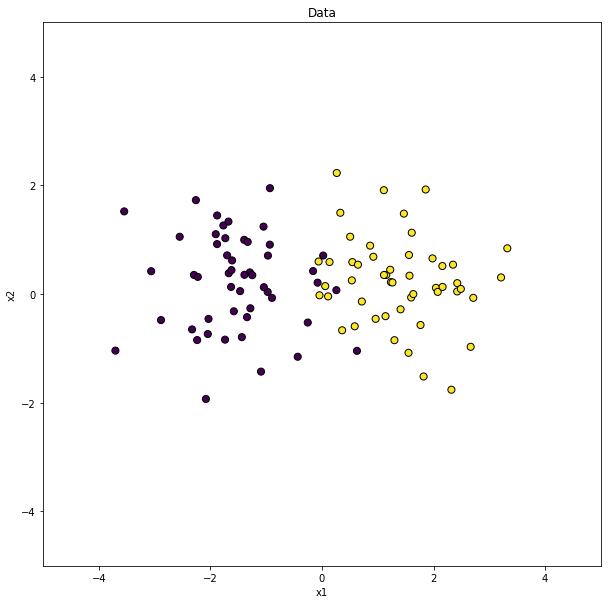

In [7]:
def get_2d_noise(n_samples, mean, variance):
    """
    Returns 2-dimensional n_samples of each class (0 and 1) 
    coming from normal distribution of ((mean, 0), variance) and ((-mean, 0), variance) 
    for classes 0 and 1 respectively
    """
    k1 = np.random.multivariate_normal([-mean, 0],[[variance,0],[0,variance]], size=n_samples)
    k2 = np.random.multivariate_normal([mean, 0],[[variance,0],[0,variance]], size=n_samples)
    x = np.concatenate([k1,k2])
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return x, y
    
n_samples = 50
mean = 1.5
variance = 1
x, y = get_2d_noise(n_samples, mean, variance)
plot_data(x, y, ['x1','x2'])

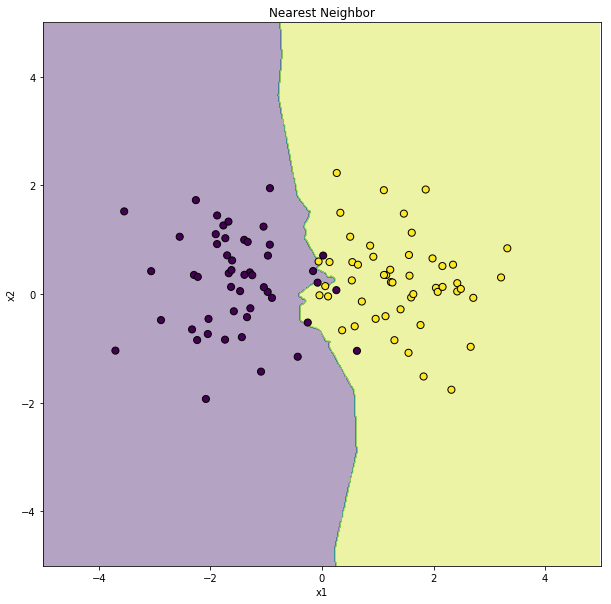

In [8]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)
plot_decision_boundaries(x, y, knn, ['x1','x2'])